In [1]:
from transmorph.datasets import load_zhou_10x

In [4]:
zhou_10x = load_zhou_10x() # batch name -> AnnData
list_anndatas = list(zhou_10x.values()) # List[AnnData]

databank_api > Loading bank zhou_10x.


In [5]:
from transmorph.engine import Model
from transmorph.engine.layers import (
    LayerInput, 
    LayerTransformation, 
    LayerMatching, 
    LayerMerging, 
    LayerOutput
)
from transmorph.engine.matching import MNN
from transmorph.engine.merging import Barycenter
from transmorph.engine.transforming import (
    CommonFeatures,
    Standardize,
    PCA
)

In [7]:
# I -> T -> Mt -> Mg -> O
linput = LayerInput()

ltrans = LayerTransformation()
ltrans.add_transformation(CommonFeatures())
ltrans.add_transformation(Standardize(center=True, scale=True))
ltrans.add_transformation(PCA(n_components=30))

lmatch = LayerMatching(MNN(n_neighbors=30))

lmerge = LayerMerging(Barycenter())
lmerge.embedding_reference = linput

lout = LayerOutput()

# Connecting layers
linput.connect(ltrans)
ltrans.connect(lmatch)
lmatch.connect(lmerge)
lmerge.connect(lout)

# Initializing model
model = Model(input_layer=linput)

In [10]:
model.fit(list_anndatas, reference=list_anndatas[0])

MODEL > Transmorph model is initializing.
MODEL > Ready to start the integration of 11 datasets, 64557 total samples.
MODEL > Running layer LAYER_INPUT#5.
MODEL > Running layer LAYER_TRANSFORMATION#6.
MODEL > Running layer LAYER_MATCHING#7.
LAYER_MATCHING#7 > Calling matching MATCHING_MNN.
MODEL > Running layer LAYER_MERGING#8.
LAYER_MERGING#8 > Running merging MERGING_BARYCENTER...
MODEL > Running layer LAYER_OUTPUT#9.
MODEL > Terminated. Total embedding shape: (64557, 5000)


In [11]:
from transmorph.utils.plotting import scatter_plot

/home/risitop/.local/share/virtualenvs/transmorph_local-RhkhmxdW/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


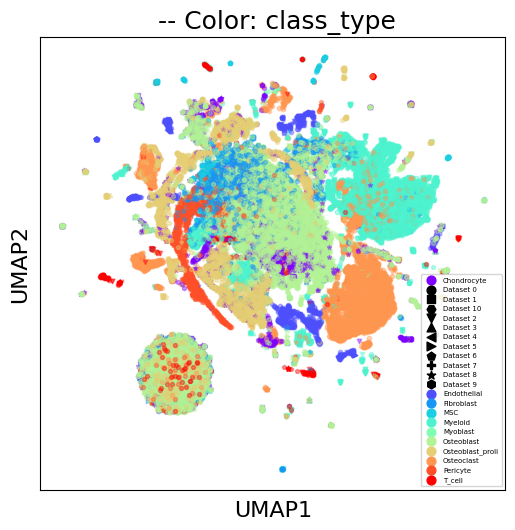

In [13]:
scatter_plot(list_anndatas, color_by="class_type")